In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)

import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('white')
plt.style.use('dark_background')

rc = plt.rcParams
rc['figure.figsize'] = (5,5)
rc['axes.spines.right'], rc['axes.spines.top'] = 0,0
rc['axes.facecolor'], rc['figure.facecolor'] = (1,1,1,0), (1,1,1,0)
rc['legend.frameon'] = False


Populating the interactive namespace from numpy and matplotlib


In [2]:
from playground import logger
from spiketag.analysis import place_field

/opt/localuser/Work/pydev/vispy/vispy/visuals/line/line.py:392: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('color', np.float32, 4)])
/opt/localuser/Work/pydev/vispy/vispy/visuals/line/arrow.py:55: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('linewidth', np.float32, 1)


In [3]:
log_file = '/data/wr97/09242020/manual_sort/process.log'
spktag_file = '/data/wr97/09242020/manual_sort/spktag/shinsort.pd'

In [4]:
log = logger(log_file)

In [5]:
ts, pos = log.to_trajectory(0)

In [6]:
log.maze_center

array([-2618.030029, -2618.030029])

In [7]:
log.maze_range

array([[-100.,  100.],
       [-100.,  100.]])

In [8]:
log.df

,time,process,level,func,msg
0,"2020-09-24 16:33:41,800",MainProcess,INFO,load_maze,maze folder: /opt/localuser/Work/pydev/playgro...
1,"2020-09-24 16:33:41,800",MainProcess,INFO,load_maze,load /opt/localuser/Work/pydev/playground/play...
2,"2020-09-24 16:33:41,801",MainProcess,INFO,load_maze,"maze_center: -2618.030029296875,-2618.03002929..."
3,"2020-09-24 16:33:41,801",MainProcess,INFO,load_maze,maze_border: [-100. -100. 100. 100.]
4,"2020-09-24 16:33:41,813",MainProcess,INFO,load_maze,load /opt/localuser/Work/pydev/playground/play...
...,...,...,...,...,...
394091,"2020-09-24 18:01:16,214",SyncManager-1,INFO,info,process shutting down
394092,"2020-09-24 18:01:16,216",SyncManager-1,INFO,info,"Failure to send message: ('#RETURN', None)"
394093,"2020-09-24 18:01:16,218",SyncManager-1,INFO,info,"... request was (None, 'shutdown', (), {})"
394094,"2020-09-24 18:01:16,218",SyncManager-1,INFO,info,"... exception was BrokenPipeError(32, 'Broken ..."


In [9]:
pc = log.to_pc()

In [10]:
pc.load_spkdf(spktag_file)

--------------- place cell object: load spktag dataframe ---------------

1. Load the spktag dataframe
    9 units are found in 40 electrode-groups

2. Align the behavior and ephys data with 0 offset
    starting at 0.000 secs, end at 2399.995 secs, step at 13.329 ms
    all units mount up to 437.935 spikes/sec

3. Calculate the place field during [0.0,2399.99508] secs
    spatially bin the maze, calculate speed and occupation_map with 2.5cm bin_size
    dump spikes when speed is lower than 5cm/secs

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])
4. Interpolate the position and speed to each spikes, check `pc.spike_df`

------------------------------------------------------------------------


occupation map from 0.01 to 2399.99, with speed cutoff:5.00


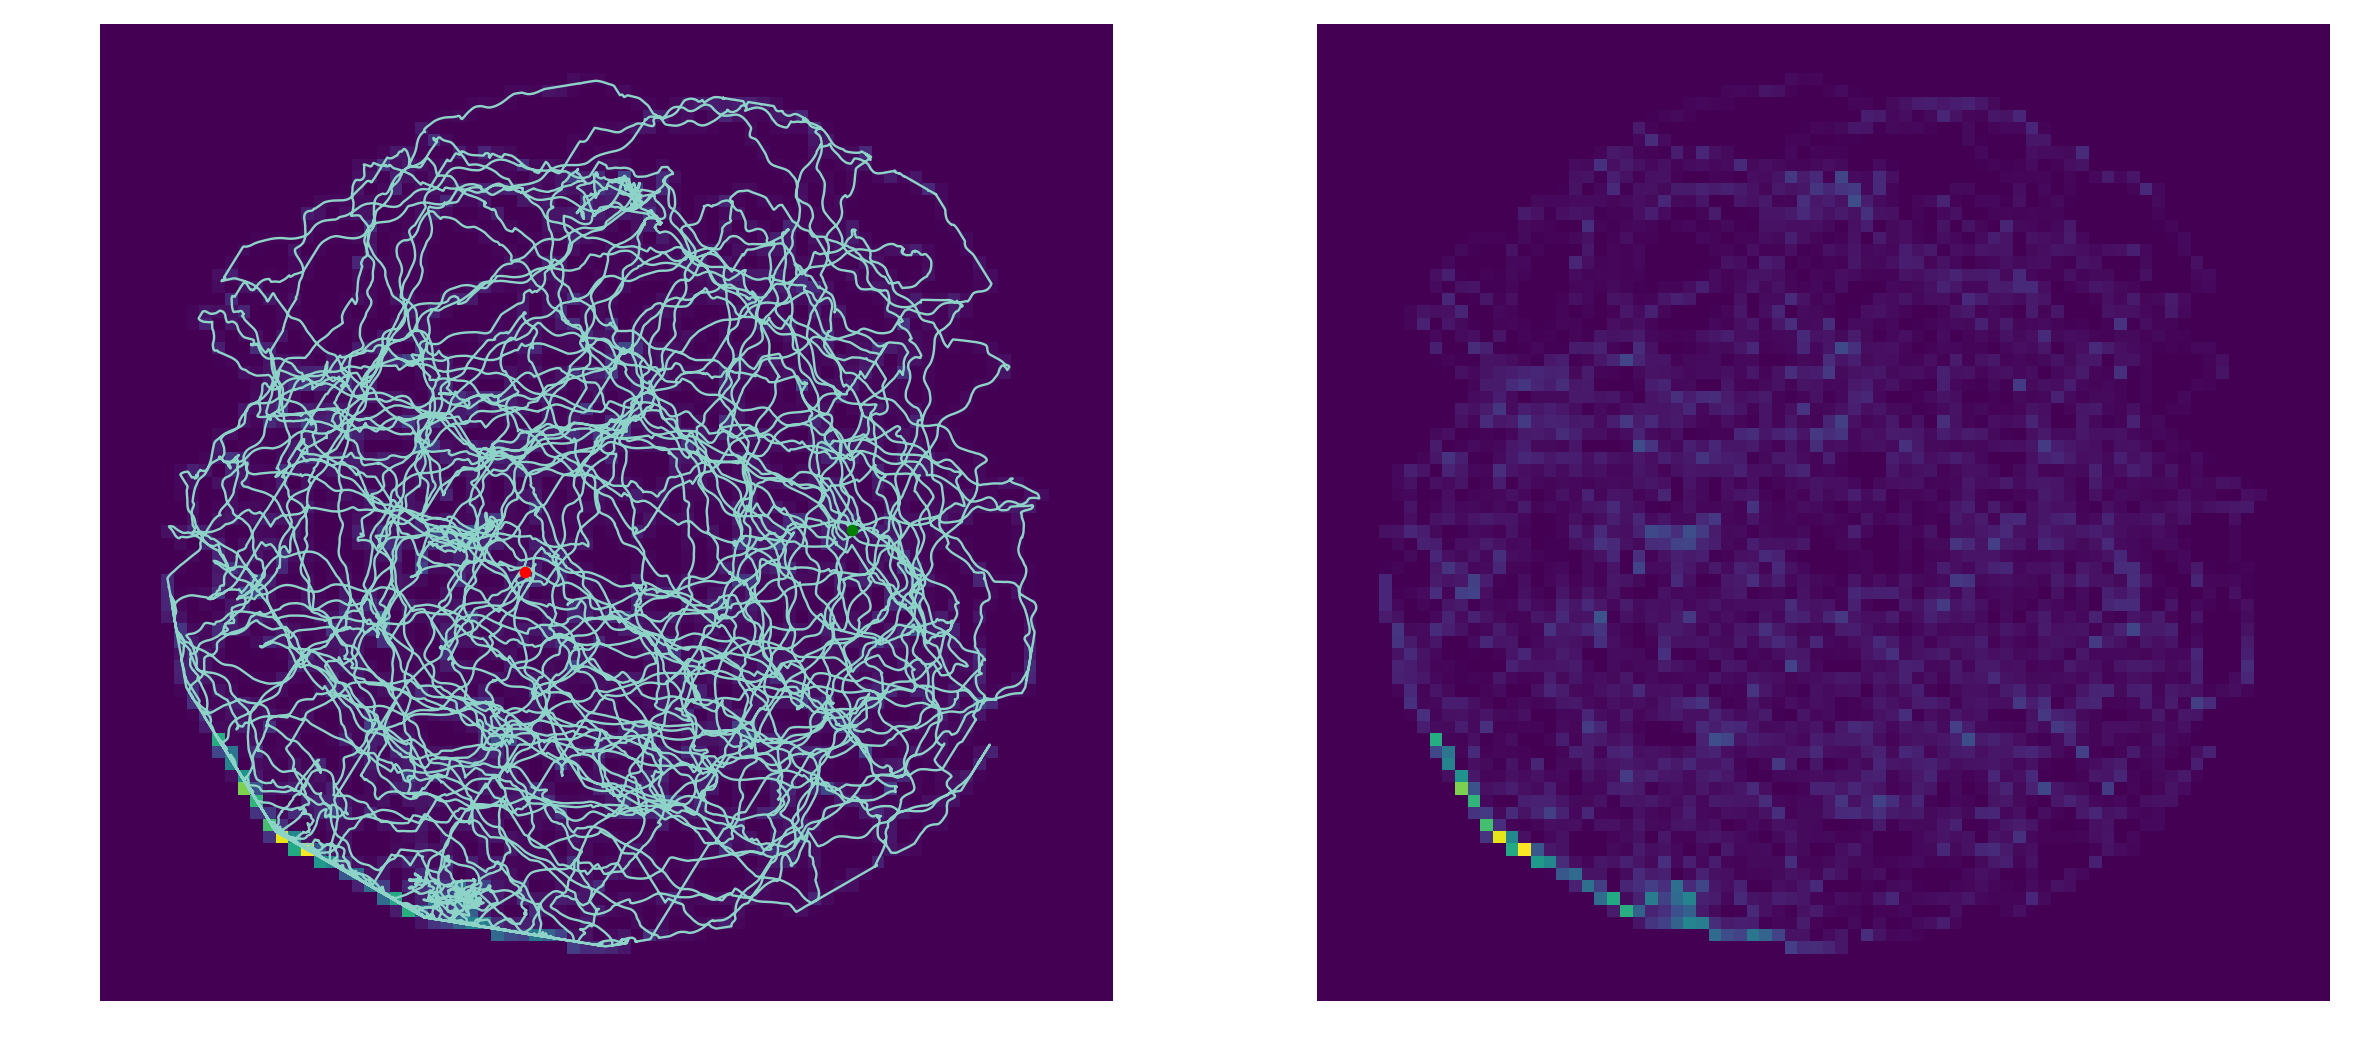

/opt/localuser/Work/pydev/spiketag/spiketag/analysis/place_field.py:371: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nrow, ncol, i+1);


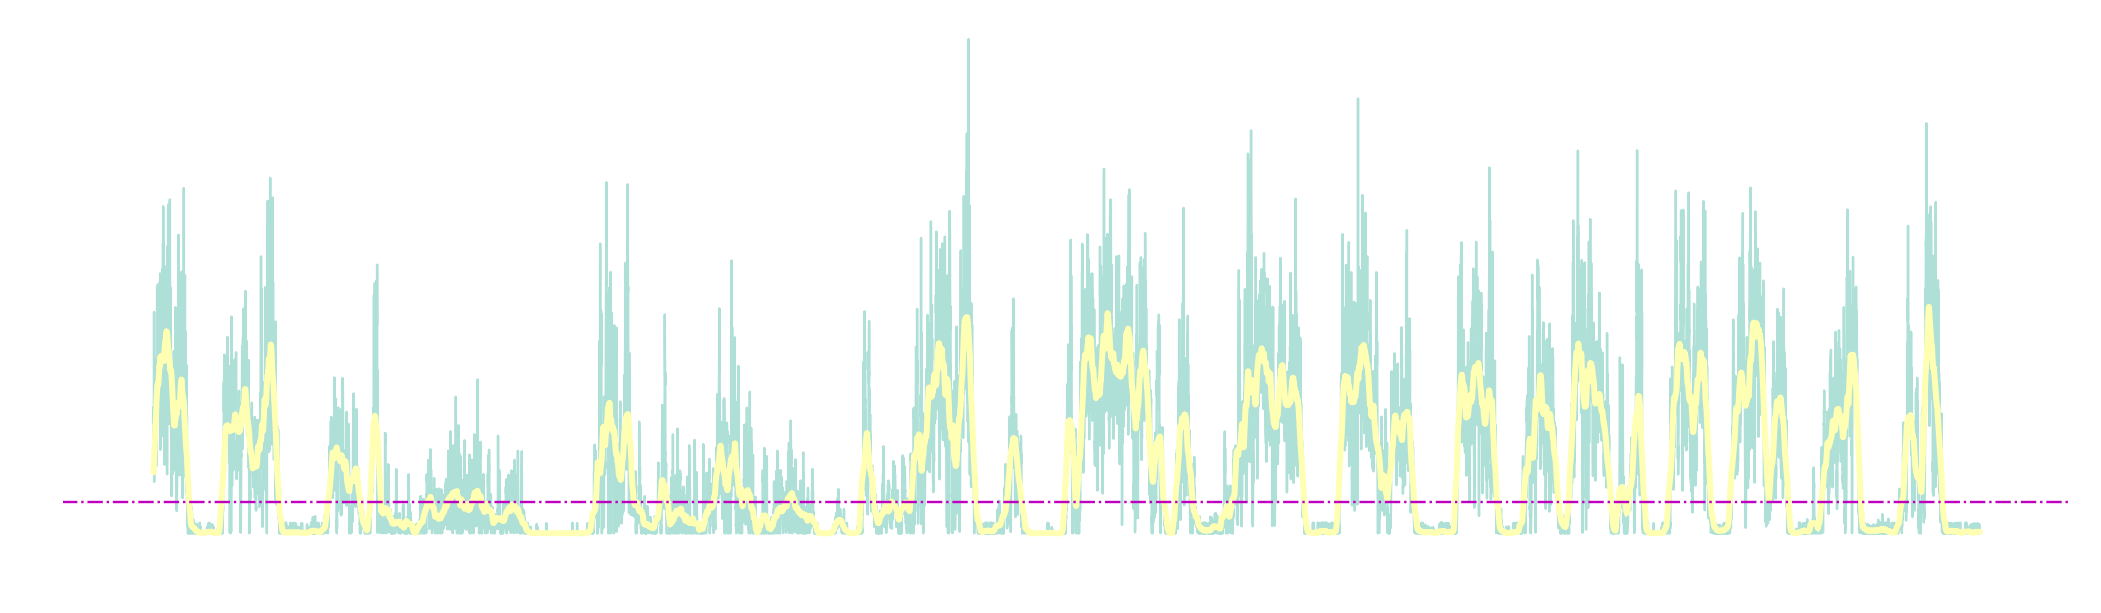

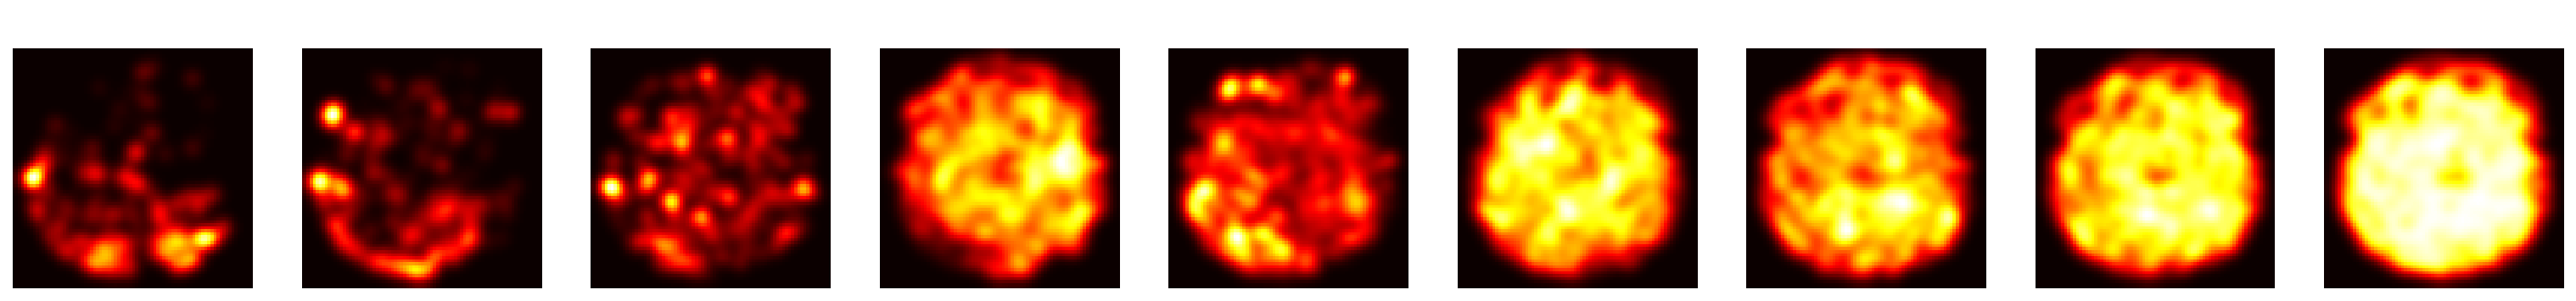

In [11]:
pc.report()

In [12]:
pc.maze_range

array([[-100.,  100.],
       [-100.,  100.]])

In [13]:
pc.maze_original

array([-100., -100.])

In [14]:
pc.maze_center

(0.0, 0.0)